Project : Customer Service Requests Analysis(Data analysis of New York City 311 Compliant calls)

Name : Darshana N

In [108]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [ ]:
df_dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', error_bad_lines=False)

In [109]:
df_dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
df_dataset.shape

df_dataset.columns

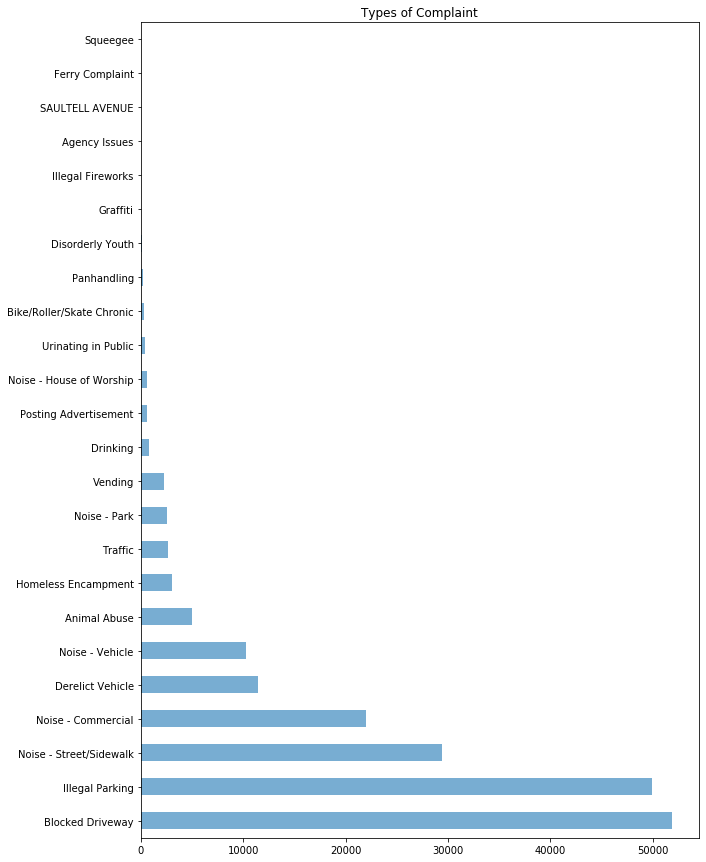

In [18]:
df_dataset['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(10,15))
plt.title('Types of Complaint')
plt.show()

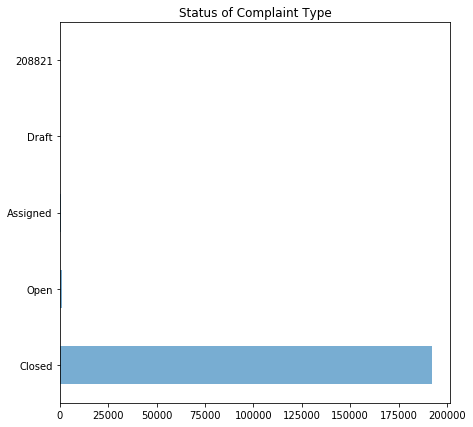

In [17]:
df_dataset['Status'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.title("Status of Complaint Type")
plt.show()

In [86]:
groupedby_complainttype = df_dataset.groupby('Complaint Type')

In [88]:
grp_data = groupedby_complainttype.get_group('Blocked Driveway')

In [89]:
grp_data.shape

(51899, 53)

In [90]:
df_dataset.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         1442
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          3943
Location Type                        128
Incident Zip                        1703
Incident Address                   27408
Street Name                        27409
Cross Street 1                     30564
Cross Street 2                     30863
Intersection Street 1             166522
Intersection Street 2             166825
Address Type                        1833
City                                1703
Landmark                          193353
Facility Type                       1443
Status                                 0
Due Date                               2
Resolution Description                 0
Resolution Action Updated Date      1467
Community Board                        1
Borough         

In [91]:
df_dataset['City'].dropna(inplace=True)

In [92]:
df_dataset['City'].shape

(191877,)

In [93]:
grp_data['City'].isnull().sum()

187

In [94]:
grp_data['City'].fillna('Unknown City', inplace =True)

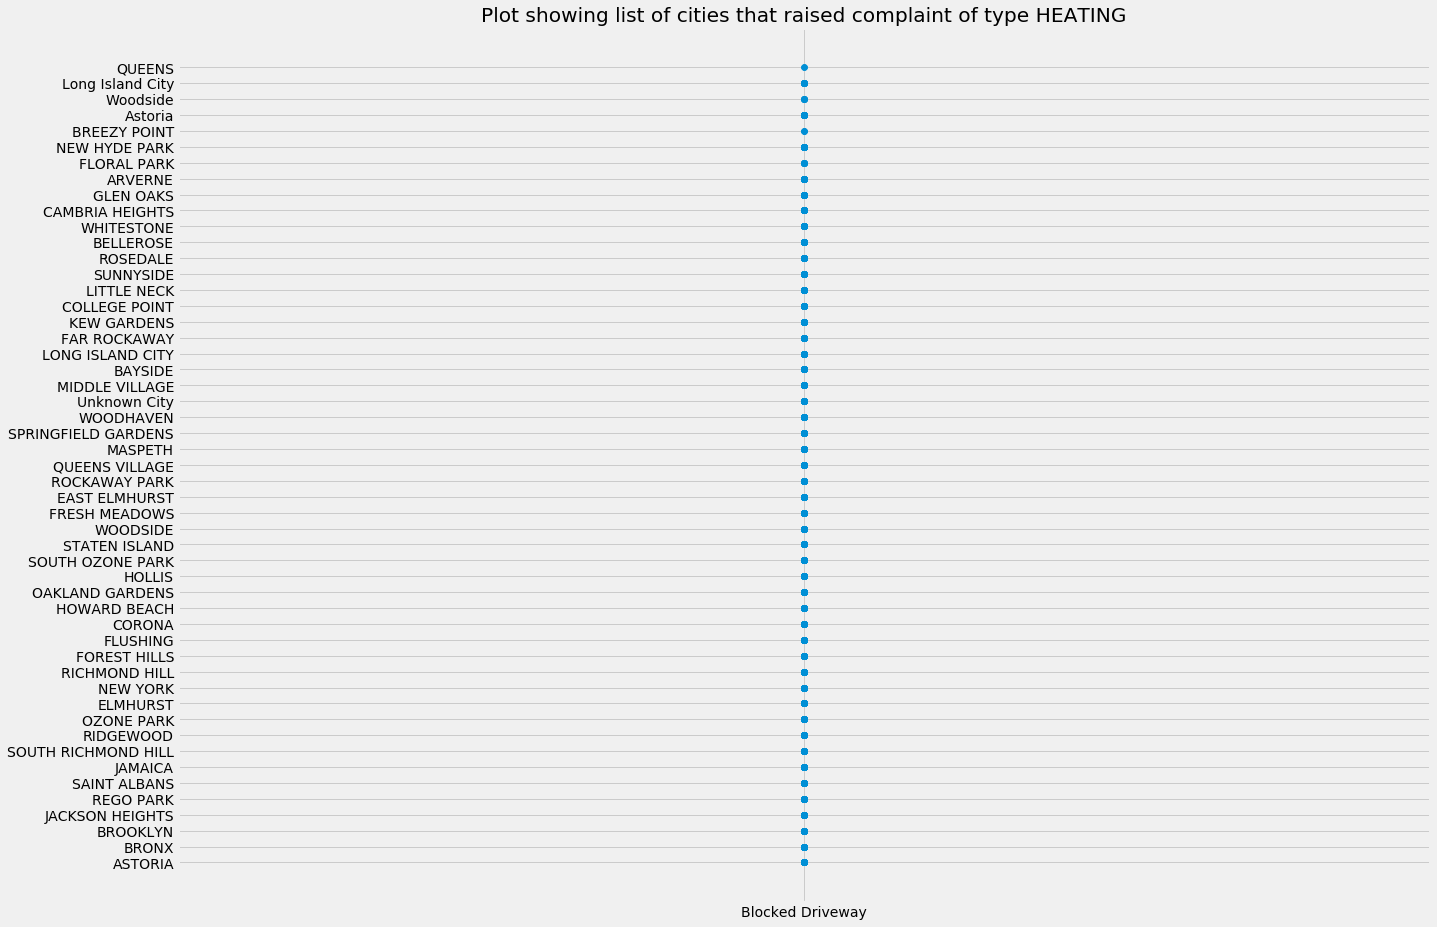

In [95]:
plt.figure(figsize=(20, 15))
plt.scatter(grp_data['Complaint Type'],grp_data['City'])
plt.title('Plot showing list of cities that raised complaint of type HEATING')
plt.show()

In [96]:
groupedby_complainttype['Complaint Type'].value_counts().nlargest(10)

Complaint Type           Complaint Type         
Blocked Driveway         Blocked Driveway           51899
Illegal Parking          Illegal Parking            49905
Noise - Street/Sidewalk  Noise - Street/Sidewalk    29448
Noise - Commercial       Noise - Commercial         22015
Derelict Vehicle         Derelict Vehicle           11426
Noise - Vehicle          Noise - Vehicle            10240
Animal Abuse             Animal Abuse                4995
Homeless Encampment      Homeless Encampment         3018
Traffic                  Traffic                     2701
Noise - Park             Noise - Park                2548
Name: Complaint Type, dtype: int64

In [98]:
df_dataset['Location Type'].fillna('Unknown Loc', inplace =True)

In [100]:
df_dataset['Location Type'].values

array(['Street/Sidewalk', 'Street/Sidewalk', 'Street/Sidewalk', ...,
       'Park/Playground', 'Street/Sidewalk', 'Street/Sidewalk'],
      dtype=object)

In [101]:
grp_data['Location Type'].isnull().sum()

37

In [ ]:
## A clear picture of the fact that all the complaints rasied of type "Blocked Driveway  " 
##This shows that majority of complaints recorded was from Data.!!

In [105]:
### Here is 2nd Analysis of Dataset..

In [42]:
df= pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',error_bad_lines=False, header=0,
    sep=',', parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')

b'Skipping line 84003: expected 53 fields, saw 60\n'


In [80]:
def prepareData(df):
    df['Resolution_Time'] = (df['Closed Date'] - df['Created Date']).dt.days
    df_clean=df[df['Resolution_Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    df_perfect['Day of Week'] = df_perfect['Created Date'].dt.dayofweek
    df_perfect['Day of Month'] = df_perfect['Created Date'].dt.day
    df_perfect['Month'] = df_perfect['Created Date'].dt.month
    df_perfect['Year'] = df_perfect['Created Date'].dt.year
    df_perfect=df_perfect[df_perfect.Borough!='Unspecified']
    return df_perfect

In [81]:
df_perfect = prepareData(df)
df_perfect.shape

(191859, 57)

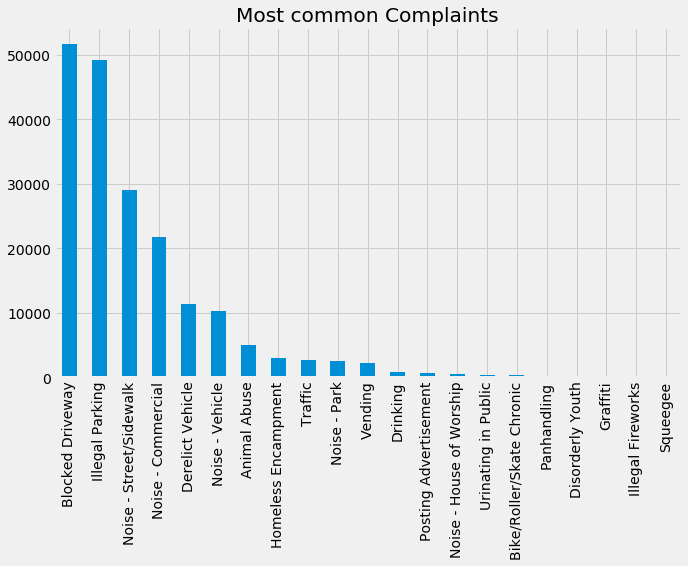

In [82]:
(df_perfect['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')

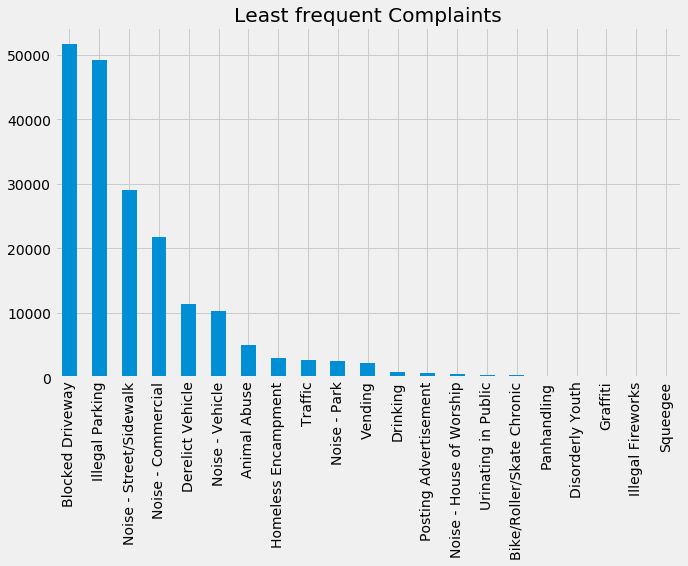

In [83]:
(df_perfect['Complaint Type'].value_counts()).tail(25).plot(kind='bar',
                    figsize=(10,6), title = 'Least frequent Complaints')

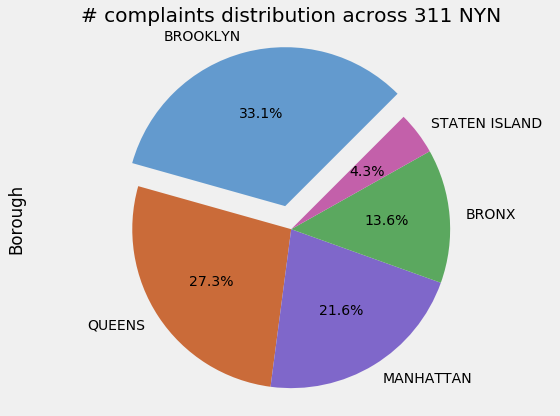

In [107]:
#colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_perfect['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across 311 NYN')
plt.tight_layout()
plt.show()

In [58]:
df_Brooklyn = df_perfect[df_perfect['Borough']=='BROOKLYN']
df_

(63572, 57)

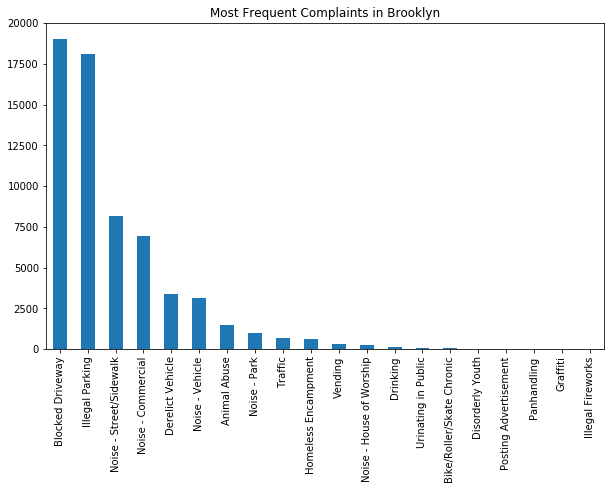

In [61]:
(df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
        figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

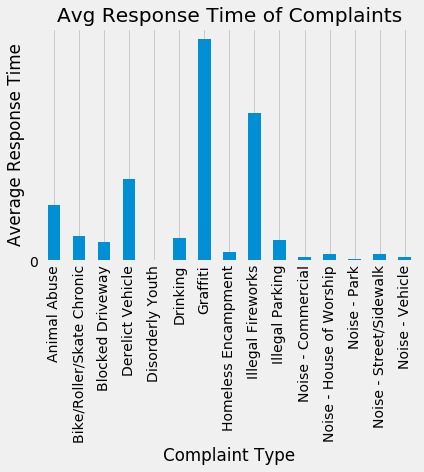

In [68]:
import matplotlib.ticker as ticker

var = df_Brooklyn.groupby('Complaint Type').Resolution_Time.mean()
frequent = df_Brooklyn['Complaint Type'].value_counts().head(25)
#var = var.ix[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Complaints")
tick_spacing = 2
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var.head(15).plot(kind='bar')

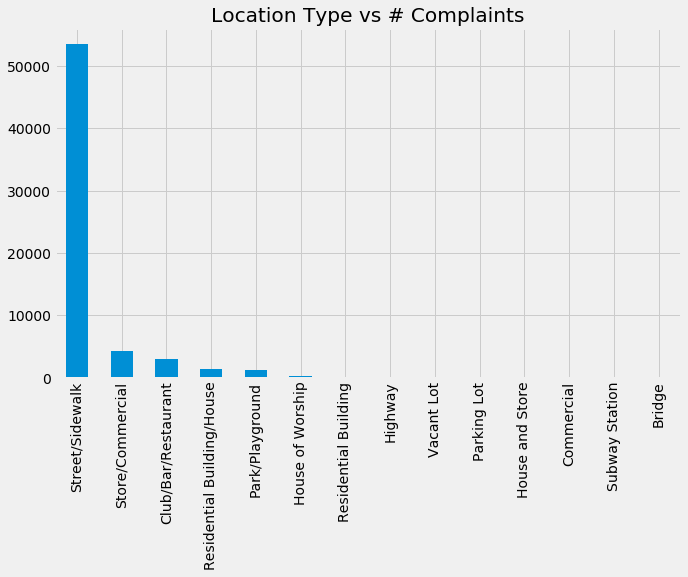

In [69]:
(df_Brooklyn['Location Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')

(-74.05417546986855, -73.84258877013144, 40.55791569532466, 40.75179388467535)

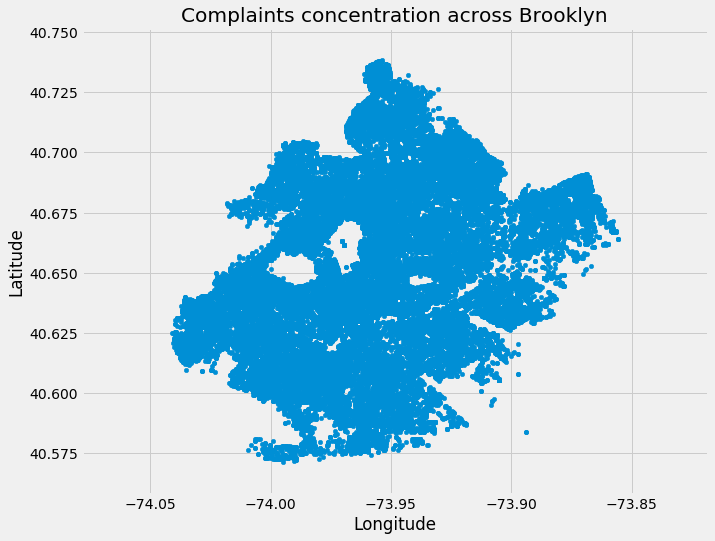

In [70]:
df_Brooklyn[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

(-74.04098818018521, -73.85577605981479, 40.57152101, 40.73818857)

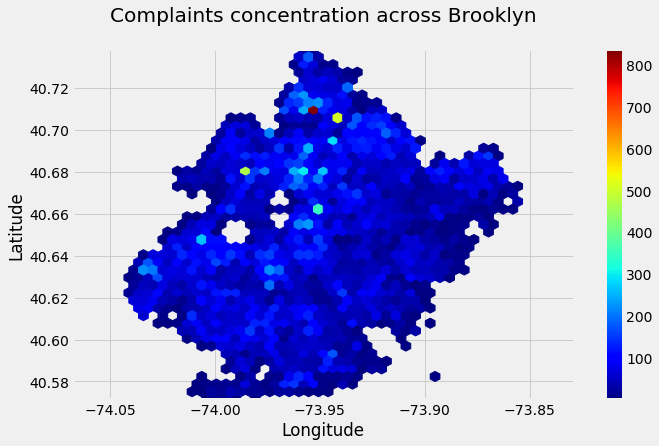

In [71]:
df_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

In [79]:
df_perfect[df_perfect['Complaint Type'] == 'HEAT/HOT WATER']['Descriptor'].value_counts()

Series([], Name: Descriptor, dtype: int64)